<a href="https://colab.research.google.com/github/AtriSaxena/Tensorflow-2.X-Zero2Mastery/blob/main/03_Introduction_to_CNN_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to CNN and Computer vision with Tensorflow

### Get the data 

The images you are working with are from Food101 dataset: https://www.kaggle.com/dansbecker/food-101

However we have modified it to only use two classes (Pizza and Steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
#Get the data 

import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download file 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall() 
zip_ref.close()

--2021-10-16 08:12:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   153MB/s    in 0.7s    

2021-10-16 08:12:57 (153 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



### Inspect the data (Become one with it) 

A very crucial step at the beginning of any machine learning project is becoming one with data. 

And for a computer vision project...this means visualizing many samples of data. 

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os 

#List through pizza_steak library and list number of files 
for dirpath, dirnames, filenames in os.walk('pizza_steak'): 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 1 images in 'pizza_steak'
There are 2 directories and 1 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 1 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [ ]:
# The extra file in our pizza_steak directory is ".DSSTORE"
!ls la pizza_steak

ls: cannot access 'la': No such file or directory
pizza_steak:
test  train


In [ ]:
#Another way to find out how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically. 

In [ ]:
#Get the class names Programmatically 

import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
class_names = class_names[1:] #Remove .DS Store
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class 

  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)

  #print(random_image[0])
  #Read in the image and plot using matplotlib 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}")

  return img

2811032.jpg
Image shape (512, 512, 3)


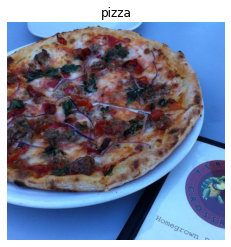

In [ ]:
img = view_random_image("pizza_steak/train/","pizza")

1313316.jpg
Image shape (384, 512, 3)


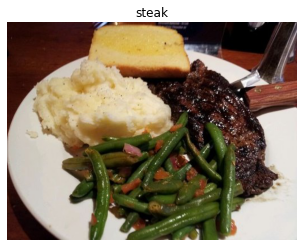

In [ ]:
img = view_random_image("pizza_steak/train/","steak")

In [ ]:
import tensorflow as tf 
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 37,   7,   5],
        [ 37,   7,   5],
        [ 37,   7,   5],
        ...,
        [ 61,  52,  57],
        [109, 100, 105],
        [102,  92, 100]],

       [[ 36,   6,   4],
        [ 36,   6,   4],
        [ 36,   6,   4],
        ...,
        [105,  96, 101],
        [124, 115, 120],
        [ 90,  80,  88]],

       [[ 36,   6,   4],
        [ 36,   6,   4],
        [ 36,   6,   4],
        ...,
        [155, 146, 151],
        [130, 120, 128],
        [ 72,  62,  70]],

       ...,

       [[ 54,  15,  10],
        [ 54,  15,  10],
        [ 54,  15,  10],
        ...,
        [222, 224, 221],
        [219, 221, 218],
        [217, 219, 216]],

       [[ 55,  16,  11],
        [ 55,  16,  11],
        [ 55,  16,  11],
        ...,
        [218, 220, 217],
        [215, 217, 214],
        [212, 214, 211]],

       [[ 55,  16,  11],
        [ 55,  16,  11],
        [ 56,  17,  12],
        ...,
        [214, 216, 21

## An end-to-end example 

Let's build a convolutional neural networks to find patterns in our images, more specifically we need a way to: 
* Load our Images 
* Preprocess our images 
* Build a CNN to find patterns in our images
* Compile our CNN 
* Fit the CNN to our training data 

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#Set the seed 
tf.random.set_seed(42)

#Preprocess the data (get all of the pixel value between 0 & 1 also called normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1.255)

#Setup paths to our data directory 
train_dir = "/content/pizza_steak/train" 
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)
valid_data = test_datagen.flow_from_directory(directory = test_dir, 
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model (Same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(input_shape=(224,224,3), filters=10, kernel_size=3, activation="relu" ),
                tf.keras.layers.Conv2D(10,3, activation="relu"),
                tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                tf.keras.layers.Conv2D(10,3, activation="relu"),
                tf.keras.layers.Conv2D(10,3, activation="relu"),
                tf.keras.layers.MaxPool2D(pool_size=2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation="sigmoid")
])

#Compile our CNN 
model_1.compile(loss="binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model 
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 260ms/step - loss: 0.5517 - accuracy: 0.7173 - val_loss: 55.5524 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4211 - accuracy: 0.8113 - val_loss: 137.3947 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4084 - accuracy: 0.8120 - val_loss: 237.5210 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3786 - accuracy: 0.8420 - val_loss: 58.0914 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3375 - accuracy: 0.8627 - val_loss: 79.9384 - val_accuracy: 0.7760


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Note: To understand about CNN a good resource. 
 https://poloclub.github.io/cnn-explainer/

### Using the same model as before (Without CNN) 



In [ ]:
import tensorflow as tf 
#set random seed 
tf.random.set_seed(42)

#create a model 
model_2 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(224,224,3)),
              tf.keras.layers.Dense(4, activation= "relu"),
              tf.keras.layers.Dense(4, activation= "relu"),
              tf.keras.layers.Dense(1, activation= "sigmoid"),

])

model_2.compile(loss="binary_crossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data= valid_data, 
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.7898 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


After almost double the parameters from Model_1, Model_2 performs worst and only guessing the prediction by only 50 %. 

Let's create similar model with more Dense layers. 


In [ ]:

#Set random seed 
tf.random.set_seed(42)

#create model 
model_3 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (224,224,3)),
              tf.keras.layers.Dense(100, activation = "relu"),
              tf.keras.layers.Dense(100, activation = "relu"),
              tf.keras.layers.Dense(100, activation = "relu"),
              tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = "binary_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 3.0882 - accuracy: 0.6220 - val_loss: 169.0034 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.7716 - accuracy: 0.7153 - val_loss: 232.6838 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6637 - accuracy: 0.7380 - val_loss: 142.9644 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6899 - accuracy: 0.7467 - val_loss: 610.8561 - val_accuracy: 0.5860
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.8320 - accuracy: 0.7320 - val_loss: 153.9570 - val_accuracy: 0.6580


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
15000000/31000 #There are 500 times more parameters in model_3 than model_1

483.8709677419355

🔑 **Note**: You can think of trainable parameters as patterns a model can learn from the data. Intutively you will think more is better. And in lot of cases it is. But in this case, the difference here is the two different types of models we're using. Where a series of dense layers has a number of different learnable parameters, ** a convolutional neural network seeks to sort out and learn the most important patterns in an image. ** So, even though there are less learnable parameters in our CNN, they are often more useful in understanding the features of image and predict the results better. 

###  Binary Classification: 

1. Become one with data ( Visualize) 
2. Preprocess the data (Prepare it for our model, the main steps are scaling and normalizing)
3. Create a model (Start with a baseline)
4. Fit the model.
5. Evaluate the model. 
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat untill satisfied. (experiment, expeiment)

### 1. Become one with data

2796102.jpg
Image shape (384, 512, 3)
1234172.jpg
Image shape (306, 512, 3)


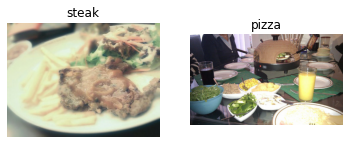

In [ ]:
plt.figure() 
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (Prepare it for a model)



In [ ]:
# Define directory dataset path 

train_dir = "pizza_steak/train/"  
test_dir =  "pizza_steak/test/"

our next step is to turn our data into **Batches** 

A batch is a small subset of data. Rather than looking at all 10,000 images at one time, a model might only look at 32 at a time. 

It does this for a couple of reason: 
1. 10,000 images (or more) might not fit into the memory of your processor (GPU) 
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Mostly 32 batch size if good. 

In [ ]:
#Create train and test generators and rescale the data. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
#Load in our image data from directories and turn them into batches 

train_data = train_datagen.flow_from_directory(directory = train_dir,  # Target directory of images 
                                               target_size= (224,224),  # Target size of images (Height/Width)
                                               class_mode="binary",  #Type of data you are working with 
                                               batch_size = 32 ) # size of mini batch

test_data = test_datagen.flow_from_directory(directory = test_dir, 
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch 
images, labels = train_data.next() 
len(images), len(labels)


(32, 32)

In [ ]:
images[:2]

array([[[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],

        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],

        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],

        ...,

        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352943]

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
labels


array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline) 



In [ ]:
#Import libraries for model creation 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import Sequential 

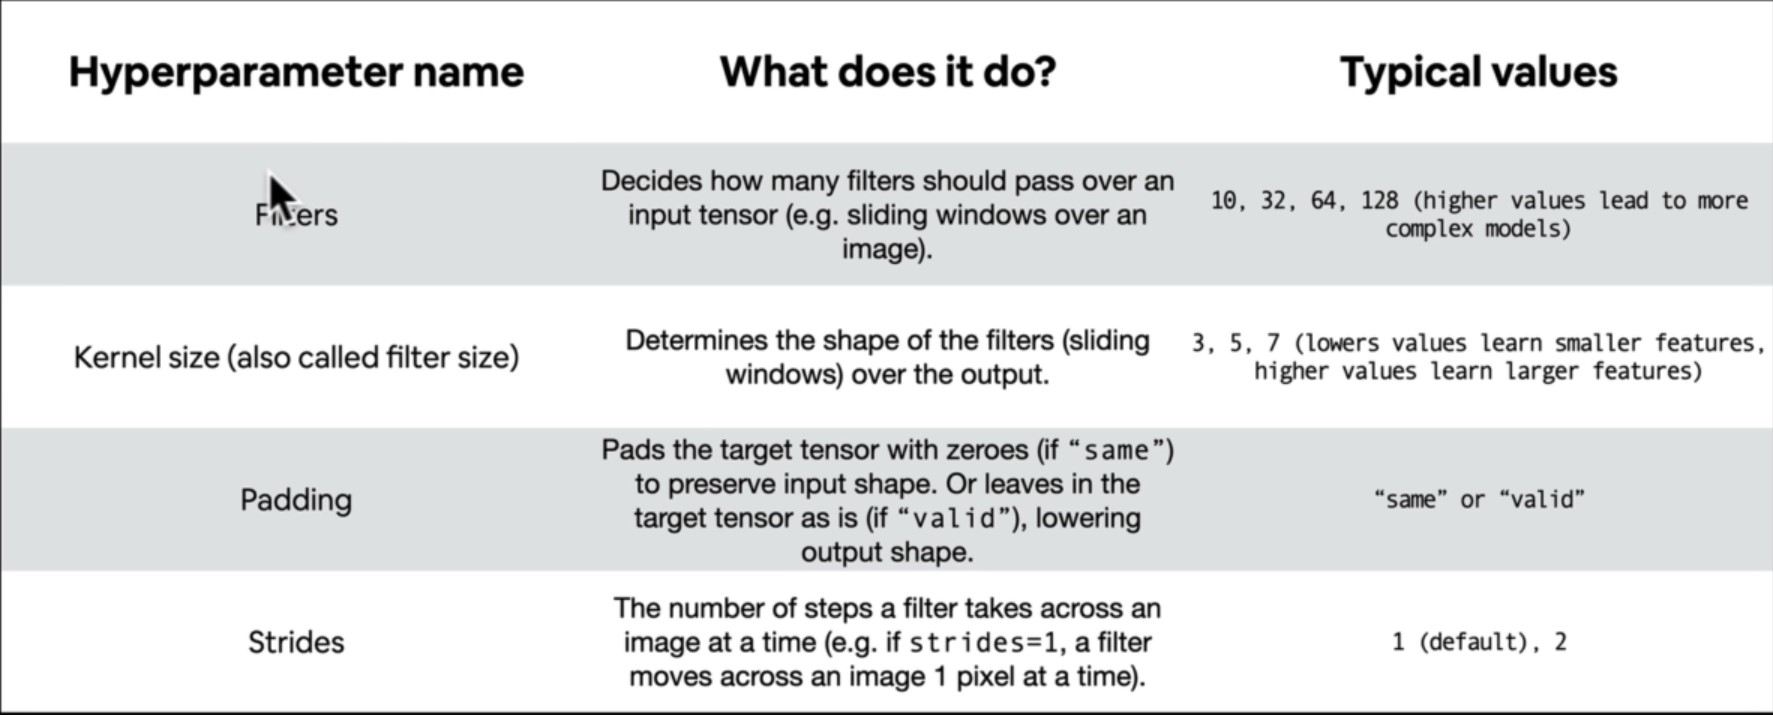

In [ ]:
tf.random.set_seed(42)
#Create the model 
model_4 = Sequential([
              Conv2D(filters=10,  
                     kernel_size=3,
                     strides=1,  
                     padding="valid", # if "same" then image size will be same. If "valid" image size will decrease 
                     activation = "relu",
                     input_shape = (224,224,3)
                     ),
              Conv2D(10,3, activation="relu"),
              Conv2D(10,3,activation="relu"),
              Flatten(),
              Dense(1, activation="sigmoid")
])

In [ ]:
#Compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#### 4. Fit the model

In [ ]:
#Train the model  
history_4 = model_4.fit(train_data, 
            epochs=5, 
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 0.7057 - accuracy: 0.7053 - val_loss: 0.4429 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4198 - accuracy: 0.8133 - val_loss: 0.3756 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3123 - accuracy: 0.8793 - val_loss: 0.3280 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 11s 236ms/step - loss: 0.1900 - accuracy: 0.9380 - val_loss: 0.4122 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.0935 - accuracy: 0.9727 - val_loss: 0.4029 - val_accuracy: 0.8180


### 4. Evaluating our model

It looks like our model is learning something, let's evaluate it. 

In [ ]:
import pandas as pd 
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.705689,0.705333,0.442878,0.794
1,0.419825,0.813333,0.375605,0.846
2,0.312347,0.879333,0.328038,0.864
3,0.190001,0.938000,0.412207,0.816
4,0.093539,0.972667,0.402877,0.818


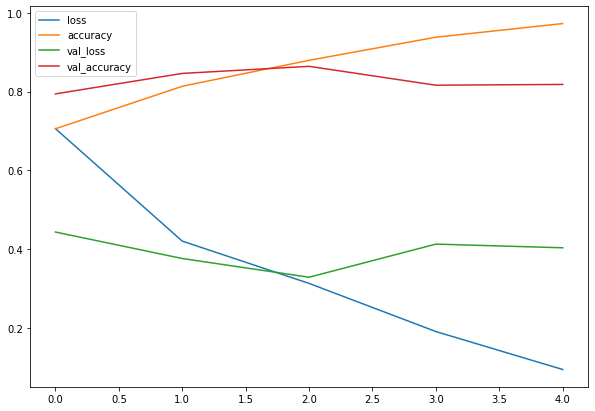

In [ ]:

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#Plot the training and validation curves seperately 
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation curves
  """ 
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for? 

  #Plot loss 
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

🔑 **Note:** When a **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. 
It means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished. 

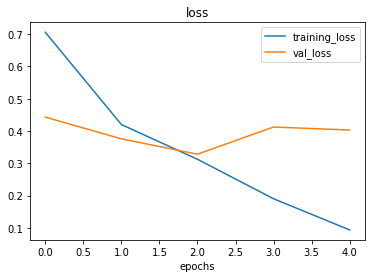

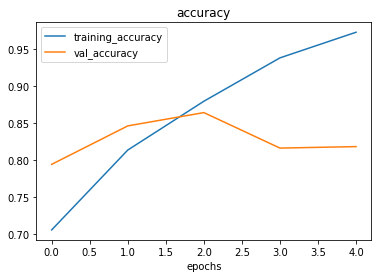

In [ ]:
plot_loss_curves(history_4)

#### 6. Adjust the model Parameters 

Fitting a machine learning model in 3 steps: 

0. Create a baseline 
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.  

Ways to Induce Overfitting: 

* Increase the number of conv layers 
* Increase the numnber of conv filters 
* Add another Dense layer to the output of our flattened layer


Reduce Overfitting: 
* Add Data Augmenatation
* Add Regularization layers (such as MaxPool2D) 
* Add more Data

In [ ]:
tf.random.set_seed(42)

model_5 = Sequential([
                  Conv2D(10,3, activation="relu", input_shape = (224,224,3)),
                  MaxPool2D(pool_size=2),
                  Conv2D(10,3, activation="relu"),
                  MaxPool2D(), 
                  Conv2D(10,3, activation="relu"),
                  MaxPool2D(),
                  Flatten(),
                  Dense(1, activation="sigmoid")
])

In [ ]:
#Compile the model 
model_5.compile(loss = "binary_crossentropy",
                optimizer= Adam(),
                metrics=["accuracy"])

In [ ]:
#Fit the model 

history_5 = model_5.fit(train_data, epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.5975 - accuracy: 0.6833 - val_loss: 0.4610 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4524 - accuracy: 0.7973 - val_loss: 0.4865 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4340 - accuracy: 0.8007 - val_loss: 0.3654 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3987 - accuracy: 0.8313 - val_loss: 0.3608 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3760 - accuracy: 0.8380 - val_loss: 0.3104 - val_accuracy: 0.8660


In [ ]:
#Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

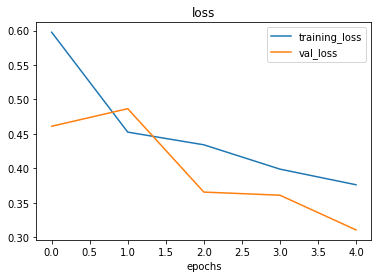

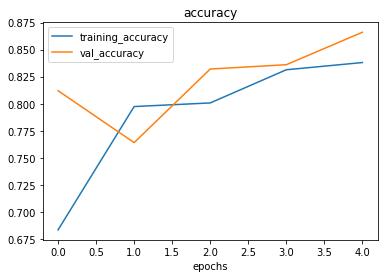

In [ ]:
#Plot loss curves 
plot_loss_curves(history_5)

#### Data Augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation 
train_datagen_augmented = ImageDataGenerator(rescale = 1/255., 
                                             rotation_range = 0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip = True)

#Create ImageDataGenerator training instance without Data Augmentation 

train_datagen = ImageDataGenerator(rescale=1/255.)

#Create ImageDataGenerator for Testing 
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:
#Import data and augment it from training directory 
print("Augmented Training Data") 

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224), 
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle = False)  #For demonstration purpose 

# Create non-augmented train data batches 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32, 
                                               class_mode = "binary",
                                               shuffle=False)

#Create non-augmented test data batches 
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary"
                                            )

Augmented Training Data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model. 

Finally...let's visualize some augmented data!!!

In [ ]:
#Get sample data batches 
images, labels = train_data.next() 
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented...only data 

showing image number: 29 


<Figure size 432x288 with 0 Axes>

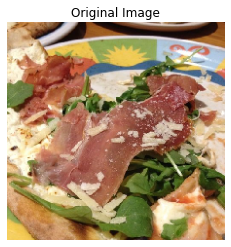

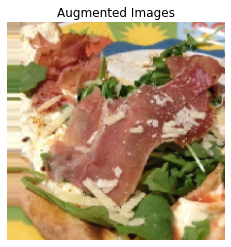

<Figure size 432x288 with 0 Axes>

In [ ]:
#Show original image and augmented image 
import random 
random_number = random.randint(0, 32)
print(f"showing image number: {random_number} ")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Images")
plt.axis(False)
plt.figure()

In [ ]:
#Create a model with augmented data 

model_6 = Sequential([
                      Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
                      MaxPool2D(pool_size=(2,2)),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

#Compile the model 
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented), 
                        validation_data= test_data,
                        validation_steps = len(test_data)) 

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.9209 - accuracy: 0.6520 - val_loss: 0.8289 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.7262 - accuracy: 0.5013 - val_loss: 0.6834 - val_accuracy: 0.5120
Epoch 3/5
47/47 [==============================] - 25s 530ms/step - loss: 0.6947 - accuracy: 0.5313 - val_loss: 0.6759 - val_accuracy: 0.6120
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6857 - accuracy: 0.5980 - val_loss: 0.6557 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6839 - accuracy: 0.6000 - val_loss: 0.6384 - val_accuracy: 0.6500


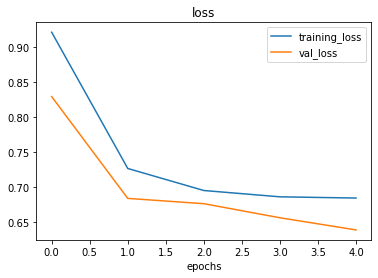

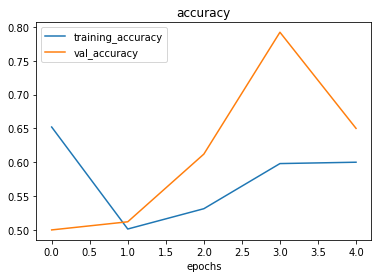

In [ ]:
plot_loss_curves(history_6)

Let's try shuffle the data (which we didnt shuffled in model_6) and train a new model_7. 


In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224), 
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
#Create a model with augmented data 
tf.random.set_seed(42)

model_7 = Sequential([
                      Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
                      MaxPool2D(pool_size=(2,2)),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

#Compile the model 
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented_shuffled), 
                        validation_data= test_data,
                        validation_steps = len(test_data)) 

Epoch 1/5
47/47 [==============================] - 27s 553ms/step - loss: 0.6849 - accuracy: 0.5047 - val_loss: 0.6536 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6361 - accuracy: 0.6280 - val_loss: 0.5508 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5929 - accuracy: 0.6700 - val_loss: 0.4898 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5366 - accuracy: 0.7287 - val_loss: 0.4207 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5080 - accuracy: 0.7420 - val_loss: 0.3907 - val_accuracy: 0.8420


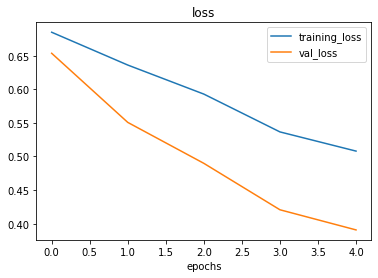

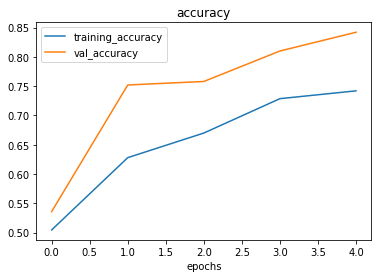

In [ ]:
  plot_loss_curves(history_7)

#### **Improve the model by self.** 




In [ ]:
#Create a model with augmented data 
tf.random.set_seed(42)

model_8 = Sequential([
                      Conv2D(15,3,input_shape=(224,224,3), activation="relu"),
                      MaxPool2D(pool_size=(2,2)),
                      Conv2D(15,3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(15,3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

#Compile the model 
model_8.compile(loss = "binary_crossentropy",
                optimizer = Adam(learning_rate=0.003),
                metrics = ["accuracy"])

#Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5, 
                        steps_per_epoch = len(train_data_augmented_shuffled), 
                        validation_data= test_data,
                        validation_steps = len(test_data)) 

Epoch 1/10
47/47 [==============================] - 27s 544ms/step - loss: 0.6711 - accuracy: 0.5887 - val_loss: 0.5242 - val_accuracy: 0.8160
Epoch 2/10
47/47 [==============================] - 25s 533ms/step - loss: 0.5490 - accuracy: 0.7240 - val_loss: 0.3906 - val_accuracy: 0.8200
Epoch 3/10
47/47 [==============================] - 25s 539ms/step - loss: 0.5366 - accuracy: 0.7367 - val_loss: 0.4002 - val_accuracy: 0.8340
Epoch 4/10
47/47 [==============================] - 25s 543ms/step - loss: 0.5171 - accuracy: 0.7493 - val_loss: 0.3247 - val_accuracy: 0.8740
Epoch 5/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4619 - accuracy: 0.7953 - val_loss: 0.4582 - val_accuracy: 0.8160
Epoch 6/10
47/47 [==============================] - 26s 549ms/step - loss: 0.4731 - accuracy: 0.7767 - val_loss: 0.2905 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4517 - accuracy: 0.7953 - val_loss: 0.3637 - val_accuracy: 0.8260

### 7.Repeat until satisified
We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
Use transfer learning to leverage what another image model has learned and adjust it for our own use case.
* Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

### Making a prediction with our trained model on our own custom data 



In [ ]:
#classes wer are working with
print(class_names)

['pizza' 'steak']


--2021-10-16 08:22:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-10-16 08:22:51 (33.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



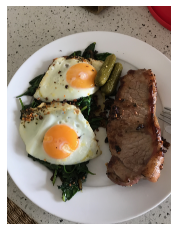

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

🔑 **Note**: When we input our image for prediction we might need to process the image according to the model trained input. 

In [ ]:
#Lets write a small function to process image. 

def load_and_prep_img(filename, img_shape = 224): 
  """
  Reads an image from Filename , turns it into a tensor and 
  reshape it to (Image_shape, Image_shape, channel)
  """ 
  #Read the image 
  img = tf.io.read_file(filename) 
  #Decode the read file into tensor 
  img = tf.image.decode_image(img) 
  #Resize the image 
  img = tf.image.resize(img, size = [img_shape, img_shape])
  #Rescale the image(get all values between 0 & 1 
  img = img/255. 
  return img 
  



In [ ]:
#Read in and pre process our custom iamge 
steak = load_and_prep_img("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8442769]], dtype=float32)

In [ ]:
#we can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class 

In [ ]:
def pred_and_plot(model, filename, class_names = class_names): 
  """
  Import an image located at filename,  makes a prediction with model and 
  plots the image with the predicted class as title. 
  """ 

  #Import the target image and process it 
  img = load_and_prep_img(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class 
  pred_class = class_names[int(tf.round(pred))] 

  #Plot the result
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

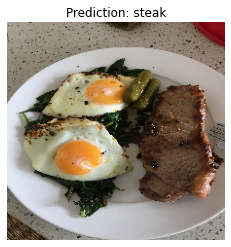

In [ ]:
#Test our model on custom image 
pred_and_plot(model_8, "03-steak.jpeg")

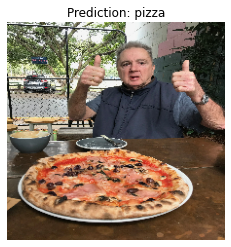

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg")  

# Multi-Class Classfication Model 

Now, we are going to implement for 10 class of food. 

1. Become one with data. 
2. Preprocess the data. 
3. Create a model. 
4. Fit a model. 
5. Evaluate the model. 
6. Adjust different hyperparameters and improve the model 
7. Repeat untill satisfied. 

![](https://camo.githubusercontent.com/6594161f0c95a7e7f66fb8a9108fb5ce0c30aa46/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f6d6973632d74656e736f72666c6f772d776f726b666c6f772d6f75746c696e652e706e67)

## 1. Import and become one with the data. 


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

#unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-17 10:49:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   181MB/s    in 2.7s    

2021-10-17 10:49:45 (181 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"): 
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/train' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream' .
There are 0 directories and 750 images in '10_food_classes_all_data/train/f

In [ ]:
#Set training and test directory 

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test"

In [ ]:
#Lets get the class names 
import pathlib 
import numpy as np 

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class 

  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)

  #print(random_image[0])
  #Read in the image and plot using matplotlib 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape {img.shape}")

  return img

Image shape (512, 384, 3)


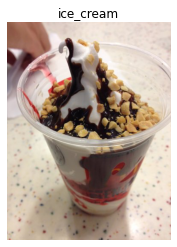

In [ ]:
#Visualize 
import random 

img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model) 



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255. )
test_datagen = ImageDataGenerator(rescale = 1/255.) 

#Load Data in from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size = (224,224),
                                               batch_size= 32, 
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size = (224,224), 
                                             batch_size = 32,
                                             class_mode = "categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline) 

We've been talking a lot about the CNN explainer website. 
how about we just take their model (also on 10 classes) and use it for our problem? 

In [ ]:
# Create the model
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation 

#Create 

model_9 = Sequential([
                      Conv2D(10, 3, input_shape=(224,224,3)),
                      Activation("relu"),
                      Conv2D(10,3,activation= "relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation=  "relu"),
                      Conv2D(10,3, activation=  "relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax")

]) 

#Compile the model 
model_9.compile(loss = "categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model 

history_9 = model_9.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), 
            validation_data = test_data, 
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 240ms/step - loss: 2.1288 - accuracy: 0.2204 - val_loss: 1.9096 - val_accuracy: 0.3260
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.8864 - accuracy: 0.3395 - val_loss: 1.8562 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.6745 - accuracy: 0.4272 - val_loss: 1.7795 - val_accuracy: 0.3904
Epoch 4/5
235/235 [==============================] - 56s 239ms/step - loss: 1.2881 - accuracy: 0.5751 - val_loss: 1.9641 - val_accuracy: 0.3852
Epoch 5/5
235/235 [==============================] - 56s 238ms/step - loss: 0.8463 - accuracy: 0.7267 - val_loss: 2.3912 - val_accuracy: 0.3480


#### 4. Evaluate the model 


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 2.3912 - accuracy: 0.3480


[2.39117169380188, 0.3479999899864197]

In [ ]:
#Plot the training and validation curves seperately 
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation curves
  """ 
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for? 

  #Plot loss 
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

### 5. Plot los curves 

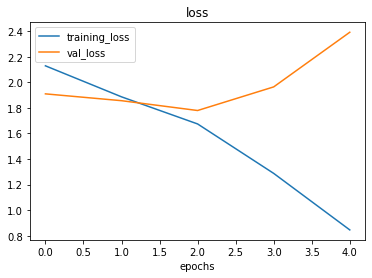

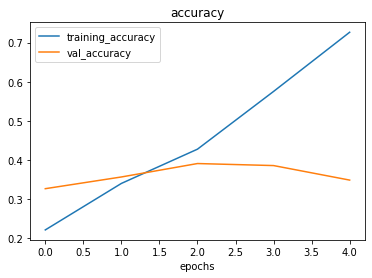

In [ ]:
#Plot loss curves 
plot_loss_curves(history_9)

From the loss curves we can say that our model is **Overfitting**. 

### 6. Adjust the model hyperparameters(to beat the baseline/reduce overfitting) 

Due  to its performance on the training data, its clear our model is learning something. However its not generalizing well to unseen data(overfitting) 

So, we can fix overfitting by: 

* **Getting more data.**  
* **Simplify the model architecture** 
* **Use Data Augmentation** 
* **Use Transfer Learning** 

In [ ]:
#How about we try to simplify the model 
#Let's try removing 2 convolutional layers. 

model_10 = Sequential([
                       Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
                       MaxPool2D(),
                       Conv2D(10,3 , activation= "relu"),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation="softmax")
])

model_10.compile(loss = "categorical_crossentropy", 
                 optimizer = tf.keras.optimizers.Adam(), 
                 metrics= ["accuracy"])

In [ ]:
history_10 = model_10.fit(train_data, 
                          epochs=5, 
                          validation_data= test_data ,
                          steps_per_epoch = len(train_data),
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 219ms/step - loss: 2.0562 - accuracy: 0.2680 - val_loss: 1.9666 - val_accuracy: 0.2976
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.6570 - accuracy: 0.4452 - val_loss: 1.9187 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 50s 214ms/step - loss: 1.1118 - accuracy: 0.6451 - val_loss: 2.0624 - val_accuracy: 0.3144
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.6268 - accuracy: 0.8193 - val_loss: 2.5750 - val_accuracy: 0.3048
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.3163 - accuracy: 0.9221 - val_loss: 3.0223 - val_accuracy: 0.2852


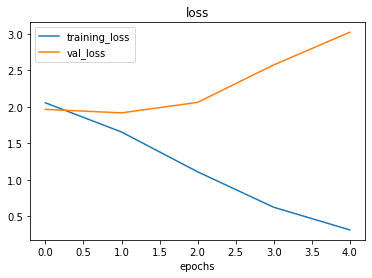

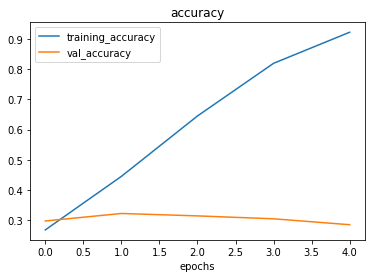

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_9.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 10)       

In [ ]:
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

Looks like our "Simplifying the model" experiment didnt worked. The accuracy went down and overfitting continued.  

How about we try data augmentation?? 




### Use Data Augmentation

Ideally we want to: 

* Reduce Overfitting. 
* Improve validation accuracy. 

In [ ]:
#Create an augmented data generator instance. 

train_datagen_augmented  = ImageDataGenerator(rescale = 1/255.,
                                              rotation_range = 0.2, 
                                              shear_range = 0.2, 
                                              zoom_range = 0.2,
                                              height_shift_range=0.2,
                                              width_shift_range=0.2,
                                              horizontal_flip = False)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size = (224,224),
                                                                    batch_size=32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
#Lets create a new model but this time train on augmented data 

model_11 = tf.keras.models.clone_model(model_9) #Clone model architecture but not weights

#Compile the model 

model_11.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0

In [ ]:
#Fit the model 
history_11 = model_11.fit(train_data_augmented, 
                          epochs = 5, 
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data, 
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 162s 560ms/step - loss: 2.1729 - accuracy: 0.2008 - val_loss: 2.0033 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0300 - accuracy: 0.2831 - val_loss: 1.8967 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 131s 557ms/step - loss: 1.9978 - accuracy: 0.2955 - val_loss: 1.8593 - val_accuracy: 0.3644
Epoch 4/5
235/235 [==============================] - 131s 558ms/step - loss: 1.9508 - accuracy: 0.3129 - val_loss: 1.8666 - val_accuracy: 0.3544
Epoch 5/5
235/235 [==============================] - 131s 557ms/step - loss: 1.9323 - accuracy: 0.3287 - val_loss: 1.8994 - val_accuracy: 0.3596


In [ ]:
#evaluate model_11
model_11.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 1.8994 - accuracy: 0.3596


[1.8994089365005493, 0.3596000075340271]

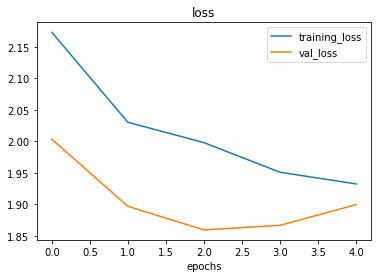

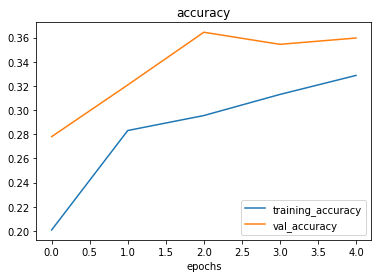

In [ ]:
plot_loss_curves(history_11)

### 7. Repeat untill satisfied 

We could keep going here...continually trying to bring our loss curves closer together. 

By running lots of experiments namely: 

* Restructuring our model's architecture (increasing layers/hidden units) 
* Adjust learning rate
* Try different methods of data augmentation (Adjust the hyperparameters in our ImageDataGenerators) 
* Training for longer. 
* Try **Transfer learning** 

### 8. **Try Prediction**  



In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#Get the images 

!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
#Make it to predict for multiclass also 

def pred_and_plot(model, filename, class_names = class_names): 
  """
  Import an image located at filename,  makes a prediction with model and 
  plots the image with the predicted class as title. 
  """ 

  #Import the target image and process it 
  img = load_and_prep_img(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  if len(pred[0])>1: 
    pred_class = class_names[tf.argmax(pred[0])]
  else: 
    #Get the predicted class 
    pred_class = class_names[int(tf.round(pred))] 

  #Plot the result
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class} with Probabiltiy: {max(pred[0])}")
  plt.axis(False)

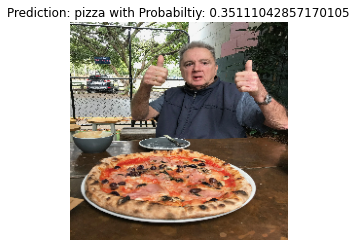

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names = class_names)

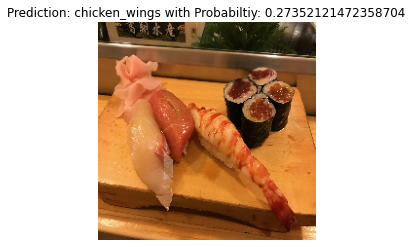

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names = class_names)

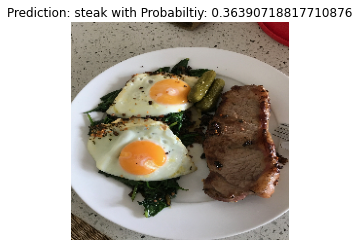

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names = class_names)

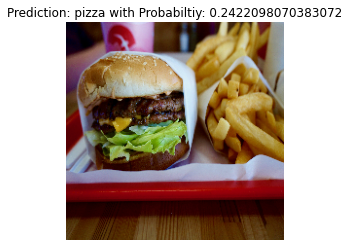

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names = class_names)

### Saving and loading our model 


In [ ]:
#save a model 
model_11.save("saved_trained_model_11")

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [ ]:
#load in a trained model and evaluate it 
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 1.8994 - accuracy: 0.3596


[1.8994085788726807, 0.3596000075340271]